In [68]:
from __future__ import annotations

from dataclasses import dataclass, field
from typing import Final

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Load a dataset into a Pandas Dataframe
dataset_df = pd.read_csv('kaggle/input/spaceship-titanic/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


The data is composed of 14 columns and 8693 entries. We can see all 14 dimensions of our dataset by printing out the first 5 entries using the following code:

In [70]:
# Display the first 5 examples
dataset_df.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

There are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column `Transported`.

# Basic exploration of the dataset

In [71]:
dataset_df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [72]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Bar chart for label column: Transported



<Axes: xlabel='Transported'>

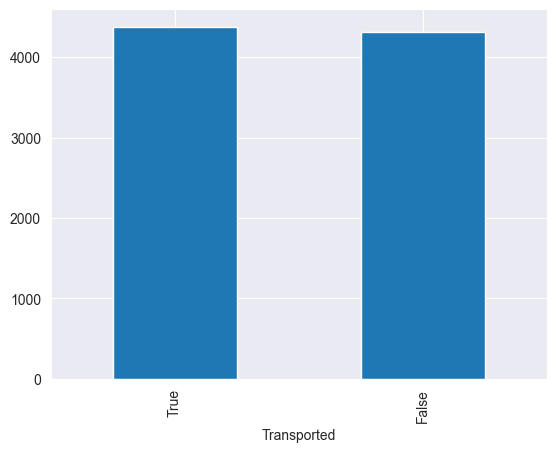

In [73]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

# Numerical data distribution

Let us plot all the numerical columns and their value counts:

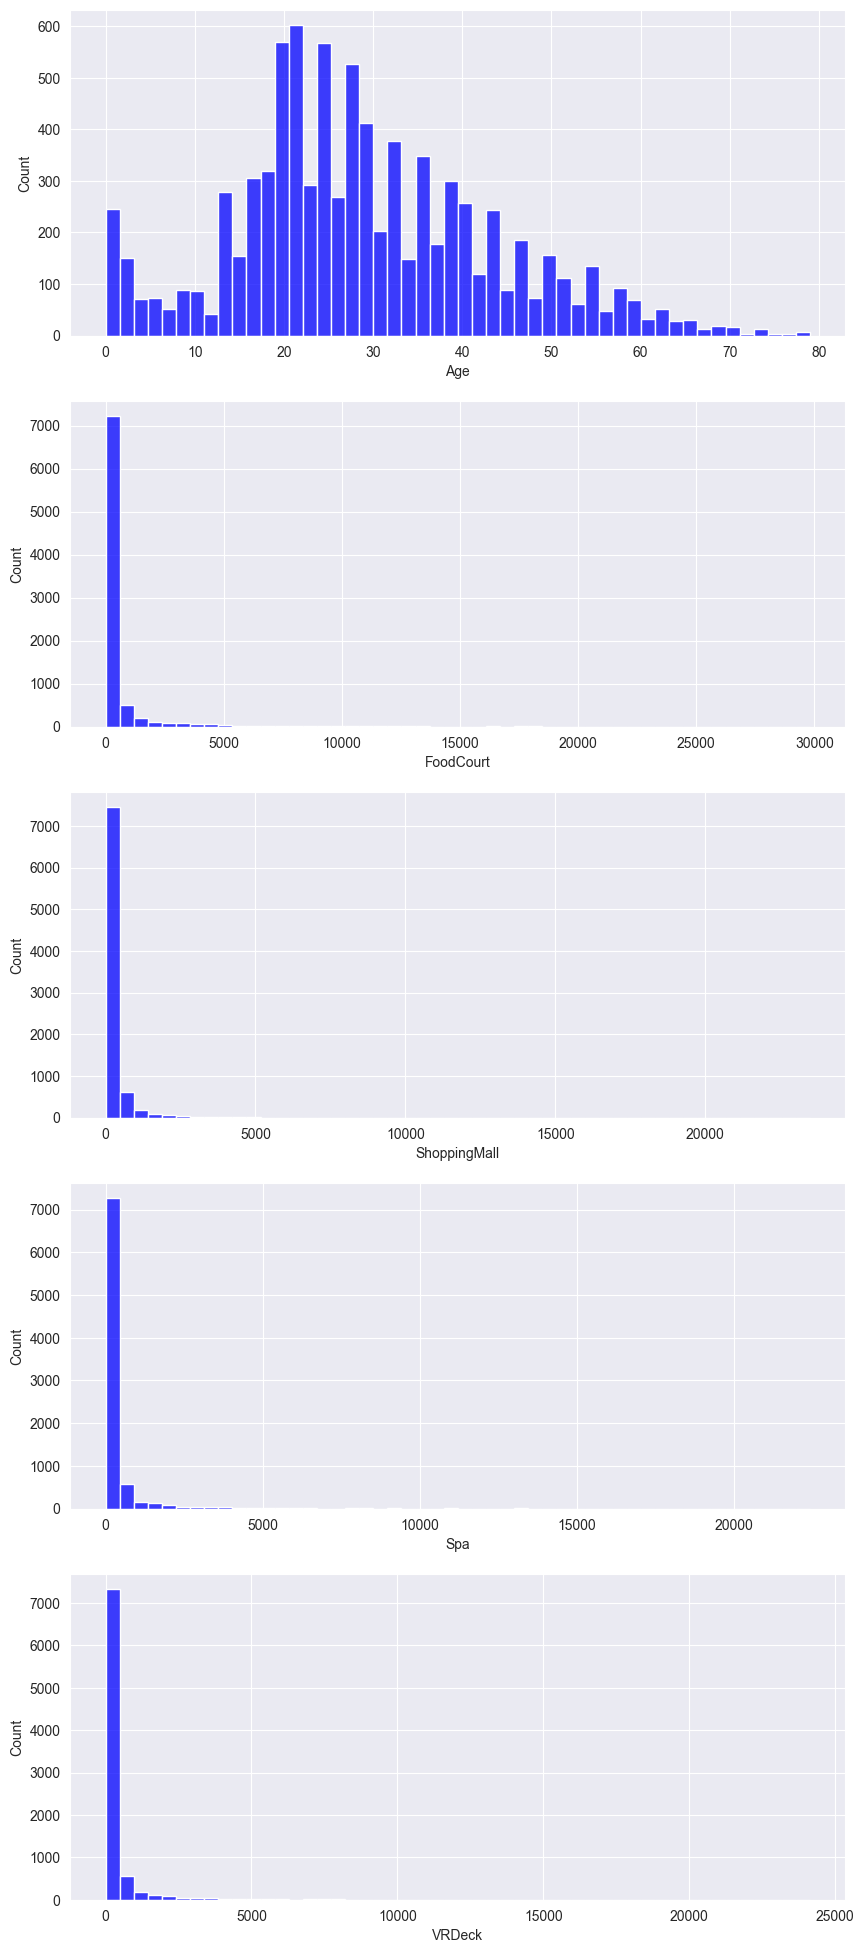

In [74]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [75]:
dataset_df.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [76]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [77]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

# Prepare the dataset

In [78]:
l = list(set(dataset_df['VIP'].values))
print(list(map(type, l)))

[<class 'bool'>, <class 'bool'>, <class 'float'>]


In [79]:
import numpy as np


@dataclass
class Preprocessor:
    _one_hot_columns: dict[str, tuple[str, ...]] = field(default_factory=dict)
    _fitted: bool = False

    def fit_transform(self, x_: pd.DataFrame) -> pd.DataFrame:
        x_ = self.transform(x_)
        self._fitted = True

        return x_

    def transform(self, x_: pd.DataFrame) -> pd.DataFrame:
        x_ = x_.copy()

        x_ = self._fill_missing_numeric(x_)
        x_ = self._fill_missing_other(x_)
        x_ = self._split_columns(x_)
        x_ = self._one_hot_encode(x_)
        x_ = self._convert_bool_object_to_bool(x_)
        x_ = self._drop_object_columns(x_)

        return x_

    def _split_columns(self, x_: pd.DataFrame) -> pd.DataFrame:
        x_[['Deck', 'Cabin_num', 'Side']] = x_['Cabin'].str.split("/", expand=True)
        x_['Cabin_num'] = pd.to_numeric(x_['Cabin_num'])
        return x_

    def _one_hot_encode(self, x_: pd.DataFrame) -> pd.DataFrame:
        columns_to_encode: Final[tuple[str, ...]] = (
            'HomePlanet',
            'Destination',
            'Deck',
            'Side'
        )

        for column_ in columns_to_encode:
            one_hot_encoded = pd.get_dummies(x_[column_], prefix=column_)

            if not self._fitted:
                self._one_hot_columns[column_] = tuple(one_hot_encoded.columns)
            else:
                extra_columns = list(
                    filter(lambda it: it not in self._one_hot_columns[column_], one_hot_encoded.columns))
                one_hot_encoded.drop(columns=extra_columns)

            x_ = x_.drop(columns=[column_]).join(one_hot_encoded)

        return x_

    def _fill_missing_numeric(self, x_: pd.DataFrame) -> pd.DataFrame:
        for column_ in x_.columns:
            if x_.dtypes[column_] not in ('float64', 'int64'):
                continue

            x_[column_].fillna(value=x_[column_].mean(), inplace=True)

        return x_

    def _fill_missing_other(self, x_: pd.DataFrame) -> pd.DataFrame:
        for column_ in x_.columns:
            if x_.dtypes[column_] in ('float64', 'int64'):
                continue

            mode = x_.mode()[column_][0]
            x_[column_].fillna(value=mode, inplace=True)

        return x_

    def _convert_bool_object_to_bool(self, x_: pd.DataFrame) -> pd.DataFrame:
        for column_ in x_.columns:
            unique_values = set(x_[column_].dropna(inplace=False).values)
            if unique_values != {True, False}:
                continue

            x_[column_] = x_[column_].apply(lambda it: it)

        return x_

    def _drop_object_columns(self, x_: pd.DataFrame) -> pd.DataFrame:
        return x_.select_dtypes(exclude='object')


pp = Preprocessor()
df_after_pp = pp.fit_transform(dataset_df)
df_after_pp

CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0         False  39.0  False          0.0        0.0           0.0     0.0   
1         False  24.0  False        109.0        9.0          25.0   549.0   
2         False  58.0   True         43.0     3576.0           0.0  6715.0   
3         False  33.0  False          0.0     1283.0         371.0  3329.0   
4         False  16.0  False        303.0       70.0         151.0   565.0   
...         ...   ...    ...          ...        ...           ...     ...   
8688      False  41.0   True          0.0     6819.0           0.0  1643.0   
8689       True  18.0  False          0.0        0.0           0.0     0.0   
8690      False  26.0  False          0.0        0.0        1872.0     1.0   
8691      False  32.0  False          0.0     1049.0           0.0   353.0   
8692      False  44.0  False        126.0     4688.0           0.0     0.0   

      VRDeck  Transported  Cabin_num  ...  Deck_A  Deck_B  Deck_C  Deck_D  \
0        0.0        False          0  ...   False    True   False   False   
1       44.0         True          0  ...   False   False   False   False   
2       49.0        False          0  ...    True   False   False   False   
3      193.0        False          0  ...    True   False   False   False   
4        2.0         True          1  ...   False   False   False   False   
...      ...          ...        ...  ...     ...     ...     ...     ...   
8688    74.0        False         98  ...    True   False   False   False   
8689     0.0        False       1499  ...   False   False   False   False   
8690     0.0         True       1500  ...   False   False   False   False   
8691  3235.0        False        608  ...   False   False   False   False   
8692    12.0         True        608  ...   False   False   False   False   

      Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0      False   False   False   False    True   False  
1      False    True   False   False   False    True  
2      False   False   False   False   False    True  
3      False   False   False   False   False    True  
4      False    True   False   False   False    True  
...      ...     ...     ...     ...     ...     ...  
8688   False   False   False   False    True   False  
8689   False   False    True   False   False    True  
8690   False   False    True   False   False    True  
8691    True   False   False   False   False    True  
8692    True   False   False   False   False    True  

[8693 rows x 26 columns]

In [80]:
df_after_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   Cabin_num                  8693 non-null   int64  
 10  HomePlanet_Earth           8693 non-null   bool   
 11  HomePlanet_Europa          8693 non-null   bool   
 12  HomePlanet_Mars            8693 non-null   bool   
 13  Destination_55 Cancri e    8693 non-null   bool 

In [81]:
df_after_pp.isnull().sum().sort_values(ascending=False)

CryoSleep                    0
Age                          0
Side_P                       0
Deck_T                       0
Deck_G                       0
Deck_F                       0
Deck_E                       0
Deck_D                       0
Deck_C                       0
Deck_B                       0
Deck_A                       0
Destination_TRAPPIST-1e      0
Destination_PSO J318.5-22    0
Destination_55 Cancri e      0
HomePlanet_Mars              0
HomePlanet_Europa            0
HomePlanet_Earth             0
Cabin_num                    0
Transported                  0
VRDeck                       0
Spa                          0
ShoppingMall                 0
FoodCourt                    0
RoomService                  0
VIP                          0
Side_S                       0
dtype: int64

In [82]:
X = df_after_pp.drop(columns=['Transported'])
y = df_after_pp['Transported']

X.isnull().sum().sort_values(ascending=False)

CryoSleep                    0
Destination_PSO J318.5-22    0
Side_P                       0
Deck_T                       0
Deck_G                       0
Deck_F                       0
Deck_E                       0
Deck_D                       0
Deck_C                       0
Deck_B                       0
Deck_A                       0
Destination_TRAPPIST-1e      0
Destination_55 Cancri e      0
Age                          0
HomePlanet_Mars              0
HomePlanet_Europa            0
HomePlanet_Earth             0
Cabin_num                    0
VRDeck                       0
Spa                          0
ShoppingMall                 0
FoodCourt                    0
RoomService                  0
VIP                          0
Side_S                       0
dtype: int64

# Train the model

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=dict(
        min_samples_split=[10, 50, 100, 200],
        max_depth=[5, 10, 15, None],
        min_samples_leaf=[10, 20, 50, 100],
        max_leaf_nodes=[2, 4, 8, 16, 32, 64],
        max_features=[None, 'log2'],
        criterion=['gini', 'log_loss', 'entropy'],
    ),
    verbose=3,
    n_jobs=2
)

gs.fit(X, y)
gs.best_params_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


KeyboardInterrupt: 

In [117]:
%%time
from sklearn.ensemble import RandomForestClassifier

gs = GridSearchCV(
    RandomForestClassifier(
        random_state=0,
        # **{'max_depth': None, 'min_samples_split': 50, 'n_estimators': 175},
        # **{'max_leaf_nodes': 128, 'min_samples_leaf': 20},
        # **{'criterion': 'gini', 'max_features': 'sqrt'},
    ),
    param_grid=dict(
        n_estimators=[175],
        min_samples_split=[10, 50, 100],
        max_depth=[5, 10, 15],
        min_samples_leaf=[20, 100],
        max_leaf_nodes=[16, 64],
        # max_features=['sqrt', 'log2'],
        # criterion=['gini', 'log_loss', 'entropy'],
    ),
    cv=4,
    verbose=10,
    n_jobs=2,
)
gs.fit(X, y)
gs.best_params_

Fitting 4 folds for each of 36 candidates, totalling 144 fits
CPU times: total: 3.2 s
Wall time: 2min 27s


{'max_depth': 10,
 'max_leaf_nodes': 64,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 175}

# Visualize the model

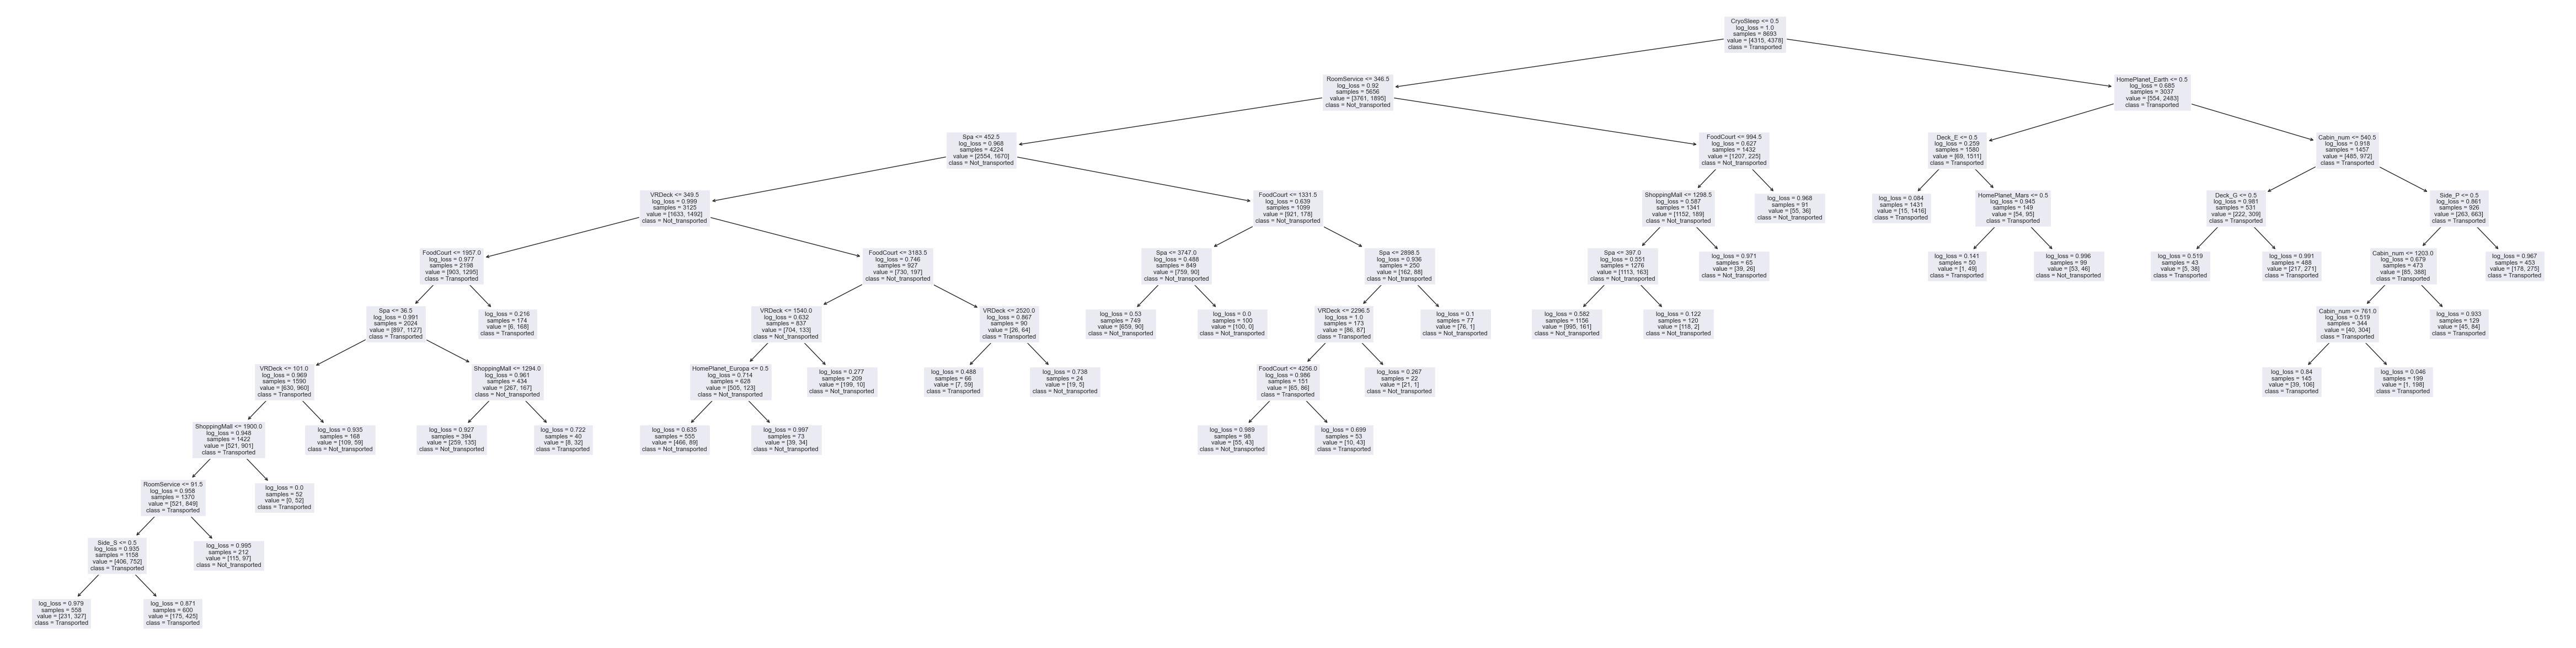

In [84]:
from sklearn import tree

model = gs.best_estimator_

fn = list(X.columns)
cn = ['Not_transported', 'Transported']
_, axes = plt.subplots(figsize=(60, 15))
tree.plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    # class_names=True,
    fontsize=8
)
plt.savefig('tree.png', dpi=200)

In [118]:
from sklearn.metrics import classification_report

y_pred = gs.best_estimator_.predict(X)
print(classification_report(y, y_pred, target_names=cn))

                 precision    recall  f1-score   support

Not_transported       0.82      0.81      0.81      4315
    Transported       0.81      0.83      0.82      4378

       accuracy                           0.82      8693
      macro avg       0.82      0.82      0.82      8693
   weighted avg       0.82      0.82      0.82      8693



In [119]:
for feat, importance in sorted(zip(X.columns, gs.best_estimator_.feature_importances_), key=lambda it: -it[1]):
    print(f'feature: {feat}, importance: {importance:.3f}')

feature: CryoSleep, importance: 0.184
feature: Spa, importance: 0.167
feature: RoomService, importance: 0.134
feature: VRDeck, importance: 0.129
feature: FoodCourt, importance: 0.090
feature: ShoppingMall, importance: 0.070
feature: HomePlanet_Europa, importance: 0.038
feature: HomePlanet_Earth, importance: 0.036
feature: Cabin_num, importance: 0.027
feature: Age, importance: 0.027
feature: Deck_G, importance: 0.017
feature: Deck_F, importance: 0.014
feature: HomePlanet_Mars, importance: 0.012
feature: Deck_E, importance: 0.012
feature: Side_S, importance: 0.009
feature: Side_P, importance: 0.009
feature: Deck_C, importance: 0.007
feature: Deck_B, importance: 0.007
feature: Destination_55 Cancri e, importance: 0.005
feature: Destination_TRAPPIST-1e, importance: 0.004
feature: Destination_PSO J318.5-22, importance: 0.001
feature: Deck_D, importance: 0.001
feature: Deck_A, importance: 0.000
feature: VIP, importance: 0.000
feature: Deck_T, importance: 0.000


In [120]:
submission_test_df = pd.read_csv('kaggle/input/spaceship-titanic/test.csv')
submission_test_df_after_pipe = pp.transform(submission_test_df)
submission_test_df_after_pipe

CryoSleep        Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0          True  27.000000  False          0.0        0.0           0.0   
1         False  19.000000  False          0.0        9.0           0.0   
2          True  31.000000  False          0.0        0.0           0.0   
3         False  38.000000  False          0.0     6652.0           0.0   
4         False  20.000000  False         10.0        0.0         635.0   
...         ...        ...    ...          ...        ...           ...   
4272       True  34.000000  False          0.0        0.0           0.0   
4273      False  42.000000  False          0.0      847.0          17.0   
4274       True  28.658146  False          0.0        0.0           0.0   
4275      False  28.658146  False          0.0     2680.0           0.0   
4276       True  43.000000  False          0.0        0.0           0.0   

         Spa  VRDeck  Cabin_num  HomePlanet_Earth  ...  Deck_A  Deck_B  \
0        0.0     0.0          3              True  ...   False   False   
1     2823.0     0.0          4              True  ...   False   False   
2        0.0     0.0          0             False  ...   False   False   
3      181.0   585.0          1             False  ...   False   False   
4        0.0     0.0          5              True  ...   False   False   
...      ...     ...        ...               ...  ...     ...     ...   
4272     0.0     0.0       1496              True  ...   False   False   
4273    10.0   144.0        160              True  ...   False   False   
4274     0.0     0.0        296             False  ...   False   False   
4275     0.0   523.0        297             False  ...   False   False   
4276     0.0     0.0       1498              True  ...   False   False   

      Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0      False   False   False   False    True   False   False    True  
1      False   False   False    True   False   False   False    True  
2       True   False   False   False   False   False   False    True  
3       True   False   False   False   False   False   False    True  
4      False   False   False    True   False   False   False    True  
...      ...     ...     ...     ...     ...     ...     ...     ...  
4272   False   False   False   False    True   False   False    True  
4273   False   False   False   False    True   False    True   False  
4274   False    True   False   False   False   False    True   False  
4275   False    True   False   False   False   False    True   False  
4276   False   False   False   False    True   False   False    True  

[4277 rows x 25 columns]

In [121]:
result = pd.DataFrame(data={
    'PassengerId': submission_test_df['PassengerId'],
    'Transported': gs.best_estimator_.predict(submission_test_df_after_pipe).astype('bool')
})
result.to_csv('submission.csv', index=False)

In [73]:
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [74]:
print(y.head())

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


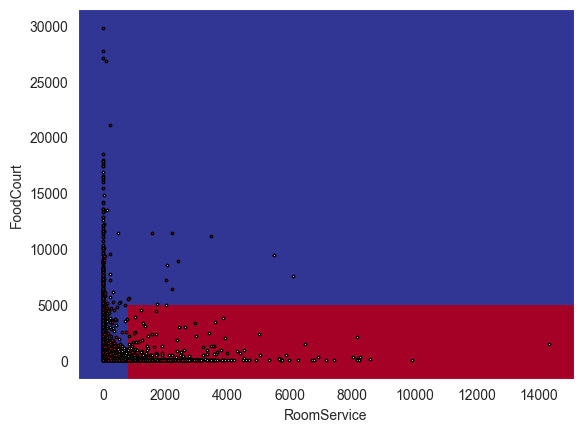

In [90]:
from sklearn.inspection import DecisionBoundaryDisplay

c1_name = 'RoomService'
c2_name = 'FoodCourt'

c1 = X[c1_name]
c2 = X[c2_name]

# TODO grid + project 2 coords
# TODO categorical features -> real numbers

n_classes = 2
plot_colors = ('#ffffff', '#ff0000')

selected_columns = pd.DataFrame({c1_name: c1, c2_name: c2})
# selected_columns = (selected_columns - selected_columns.mean()) / selected_columns.std()

ax = plt.subplot()
db = DecisionBoundaryDisplay.from_estimator(
    DecisionTreeClassifier(**gs.best_params_).fit(selected_columns, y),
    selected_columns,
    cmap='RdYlBu',
    response_method='predict',
    plot_method='pcolormesh',
    grid_resolution=10,
    xlabel=c1_name,
    ylabel=c2_name,
    ax=ax,
)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        x=X.loc[idx, c1_name],
        y=X.loc[idx, c2_name],
        c=color,
        label=X.columns[i],
        edgecolor='black',
        s=3,
    )

# plt.title('Decision Boundary')
# plt.xlabel(c1_name)
# plt.ylabel(c2_name)
plt.show()